# Use Simpson's rule to evaluate $\int \frac{ \phi_{\nu}(\boldsymbol{r}_2) \phi_{\lambda}(\boldsymbol{r}_2)}{r_{12}}  d\boldsymbol{r}_2$

## Equation
$  \int \frac{ \phi_{\nu}(\boldsymbol{r}_2) \phi_{\lambda}(\boldsymbol{r}_2)}{r_{12}}  d\boldsymbol{r}_2 \approx \sum^{M}_{k=0}  \frac{g_k}{\pi^{1/2}}  \int \phi_{\nu}(\boldsymbol{r}_2) \phi_{\lambda}(\boldsymbol{r}_2)  e^{-t^2 ||\boldsymbol{r}_1 - \boldsymbol{r}_2||^2} d\boldsymbol{r}_2 $

## Code
    simp_cof = zeros(n+1,1);
    simp_cof(1) = 1/3;
    simp_cof(n+1) = 1/3;
    simp_cof(n) = 4/3;
    simp_cof(2:n-1) = repmat([4 2]',(n-2)/2,1)./3;
    
    F_x = [GG_x(:,i,j).*simp_cof;zeros(size(x))];
    F_y = [GG_y(:,i,j).*simp_cof;zeros(size(y))];
    F_z = [GG_z(:,i,j).*simp_cof;zeros(size(z))];

    ...
    for m = 1:rank
      G = [p_1d(:,m);zeros(size(x))];

      cFG_x = ifft(fft(F_x).*fft(G));
      cFG_y = ifft(fft(F_y).*fft(G));
      cFG_z = ifft(fft(F_z).*fft(G));

      fp_x(:,m,i,j) = cFG_x((n/2:n/2+n)+1);
      fp_y(:,m,i,j) = cFG_y((n/2:n/2+n)+1);
      fp_z(:,m,i,j) = cFG_z((n/2:n/2+n)+1);
    end
  
  ## Results: O STO-3G
  1. The following is the norm and maximum errors from STO-3G O calculations.
  2. The box size is [-15, 15], and $C_0$ = 1.65.

  

  

In [72]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [74]:
import matplotlib.pylab as plt_lab
data = plt_lab.csv2rec('o_sto3g_simp.csv')
#data.dtype

[ 26  56 106] ['0.0042056344' '0.0141863161' '0.0603386171']
[ 26  56 106 156 256] ['0.0043930979' '0.0003596176' '0.0000446953' '0.0000104196' '0.0000312165']
[ 26  56 106] ['0.0043930979' '0.0003596176' '0.0000446976']


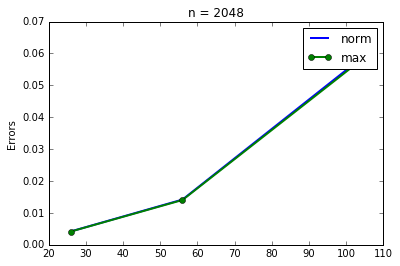

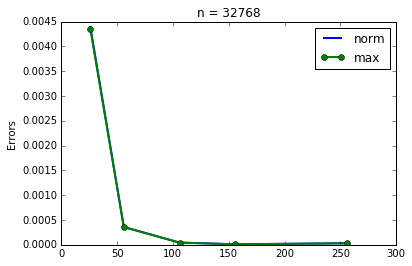

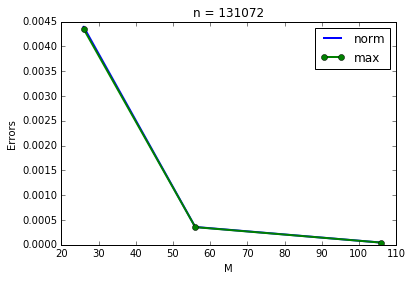

In [89]:
f, ax = plt.subplots()
print(data.m[1:4], data.n__2048[1:4])
ax.plot(data.m[1:4], data.n__2048[1:4], lw=2, label="norm")
ax.plot(data.m[1:4], data.column2[1:4], lw=2, marker='o', label="max")
plt.legend()
plt.title('n = 2048')
plt.ylabel("Errors")

f, ax = plt.subplots()
print(data.m[1:6], data.n__32768[1:6])
ax.plot(data.m[1:6], data.n__32768[1:6], lw=2, label="norm")
ax.plot(data.m[1:6], data.column4[1:6], lw=2, marker='o',  label="max")
plt.legend()
plt.title('n = 32768')
plt.ylabel("Errors")

f, ax = plt.subplots()
print(data.m[1:4], data.n__131072[1:4])
ax.plot(data.m[1:4], data.n__131072[1:4], lw=2, label="norm")
ax.plot(data.m[1:4], data.column6[1:4], lw=2, marker='o',  label="max")
plt.legend()
plt.title('n = 131072')
plt.xlabel("M")
plt.ylabel("Errors")